In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(size):
    x = np.linspace(0, 5, size)
    y = x * np.sin(x ** 2) + 1
    return (x,y)

def sample(size):
    x = np.linspace(0, 5, size)
    y = x * np.sin(x ** 2) + 1 + np.random.randn(x.size)*0.5
    return (x,y)

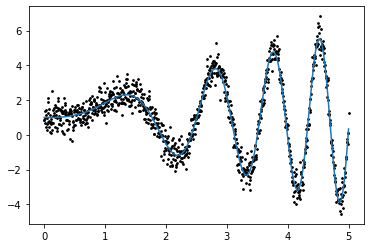

In [3]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
X, y = sample(1000)
plt.scatter(X, y, s=3, c="black")
plt.show()

In [4]:
X.shape, y.shape

((1000,), (1000,))

In [5]:
X = X.reshape(-1,1) # 투 디멘션으로
y = y.reshape(-1,1)
X.shape, y.shape

((1000, 1), (1000, 1))

In [6]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

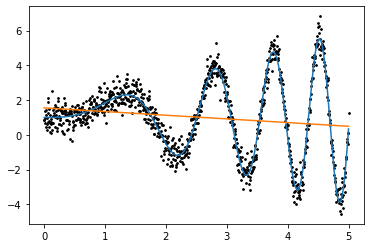

In [7]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s=3, c="black") # 투 디멘션에서 원디멘션
plt.plot(X.flatten(), lr.predict(X).flatten()) 
plt.show()

In [8]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)
X_poly[:10]

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.00500501e-03, 2.50500751e-05],
       [1.00000000e+00, 1.00100100e-02, 1.00200300e-04],
       [1.00000000e+00, 1.50150150e-02, 2.25450676e-04],
       [1.00000000e+00, 2.00200200e-02, 4.00801202e-04],
       [1.00000000e+00, 2.50250250e-02, 6.26251878e-04],
       [1.00000000e+00, 3.00300300e-02, 9.01802704e-04],
       [1.00000000e+00, 3.50350350e-02, 1.22745368e-03],
       [1.00000000e+00, 4.00400400e-02, 1.60320481e-03],
       [1.00000000e+00, 4.50450450e-02, 2.02905608e-03]])

In [9]:
lr = LinearRegression()
lr.fit(X_poly,y)

LinearRegression()

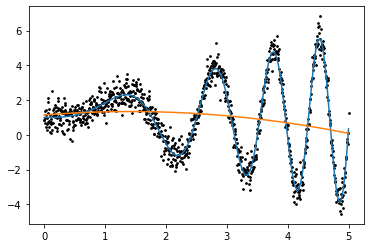

In [10]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s=3, c="black")
plt.plot(X.flatten(), lr.predict(X_poly).flatten())
plt.show()

In [11]:
poly_features = PolynomialFeatures(degree=16)
X_poly = poly_features.fit_transform(X)
X_poly[:3]

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [1.00000000e+00, 5.00500501e-03, 2.50500751e-05, 1.25375751e-07,
        6.27506263e-10, 3.14067198e-12, 1.57190790e-14, 7.86740691e-17,
        3.93764110e-19, 1.97079134e-21, 9.86382051e-24, 4.93684710e-26,
        2.47089445e-28, 1.23668391e-30, 6.18960915e-33, 3.09790248e-35,
        1.55050174e-37],
       [1.00000000e+00, 1.00100100e-02, 1.00200300e-04, 1.00300601e-06,
        1.00401002e-08, 1.00501504e-10, 1.00602106e-12, 1.00702808e-14,
        1.00803612e-16, 1.00904517e-18, 1.01005522e-20, 1.01106629e-22,
        1.01207837e-24, 1.01309146e-26, 1.01410556e-28, 1.01512068e-30,
        1.01613682e-32]])

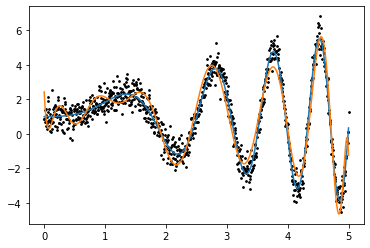

In [13]:
lr = LinearRegression()
lr.fit(X_poly,y)
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s=3, c="black")
plt.plot(X.flatten(), lr.predict(X_poly).flatten())
plt.show()

In [14]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [15]:
poly_range = list(range(10, 50))
rmse_lr_list = []
rmse_lasso_list = []
rmse_ridge_list = []

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

for poly_value in poly_range:
    poly_features = PolynomialFeatures(degree=poly_value)
    X_poly = poly_features.fit_transform(X)
    lr = LinearRegression(fit_intercept=False)
    lr.fit(X_poly,y)
    
    rmse_lr_list.append(rmse(lr.predict(X_poly), y))

    lasso = Lasso(fit_intercept=False)
    lasso.fit(X_poly,y)
    rmse_lasso_list.append(rmse(lasso.predict(X_poly), y))
    
    ridge = Ridge(fit_intercept=False)
    ridge.fit(X_poly,y)
    rmse_ridge_list.append(rmse(ridge.predict(X_poly), y))

C:\Users\insid\anaconda3\envs\ml_scratch\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2096.227342389537, tolerance: 0.4570949623505063
  positive)
C:\Users\insid\anaconda3\envs\ml_scratch\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2090.844507330604, tolerance: 0.4570949623505063
  positive)
C:\Users\insid\anaconda3\envs\ml_scratch\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.00523e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\insid\anaconda3\envs\ml_scratch\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2086.011

C:\Users\insid\anaconda3\envs\ml_scratch\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1988.1733389666172, tolerance: 0.4570949623505063
  positive)
C:\Users\insid\anaconda3\envs\ml_scratch\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1980.625584948274, tolerance: 0.4570949623505063
  positive)
C:\Users\insid\anaconda3\envs\ml_scratch\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1972.9657434464586, tolerance: 0.4570949623505063
  positive)
C:\Users\insid\anaconda3\envs\ml_scratch\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not con

In [16]:
import pandas as pd
from pandas import DataFrame
data = {"poly_range":poly_range, "lr_rmse":rmse_lr_list, 
        "lasso_rmse":rmse_lasso_list,"ridge_rmse":rmse_ridge_list}
df = DataFrame(data).set_index("poly_range")
df

,lr_rmse,lasso_rmse,ridge_rmse
poly_range,,,
10,1.922966,2.223039,1.951448
11,1.915343,2.230379,1.930047
12,1.656895,2.234653,1.929126
13,1.367945,2.237170,1.903476
14,1.354690,2.238656,1.748850
15,0.924871,2.239485,1.502748
16,0.720363,2.239849,1.510916
17,0.690698,2.239868,1.315787
18,0.714436,2.239638,0.897530


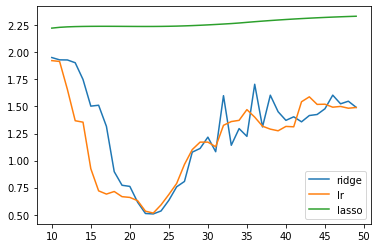

In [17]:
plt.plot(poly_range, df["ridge_rmse"], label="ridge")
plt.plot(poly_range, df["lr_rmse"], label="lr")
plt.plot(poly_range, df["lasso_rmse"], label="lasso")
plt.legend()
plt.show()

In [19]:
df.min()

lr_rmse       0.515293
lasso_rmse    2.223039
ridge_rmse    0.507494
dtype: float64

In [20]:
df["ridge_rmse"].sort_values().head()

poly_range
23    0.507494
22    0.511299
24    0.534785
21    0.615318
25    0.633406
Name: ridge_rmse, dtype: float64

In [21]:
poly_features = PolynomialFeatures(degree=22)
X_poly = poly_features.fit_transform(X)
ridge = Ridge(fit_intercept=False)
ridge.fit(X_poly,y)

Ridge(fit_intercept=False)

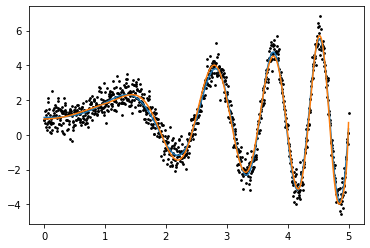

In [22]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s=3, c="black")
plt.plot(X.flatten(), ridge.predict(X_poly).flatten())
plt.show()